# Info

* Data: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn

In [2]:
import os
from pathlib import Path

In [3]:
import seaborn as sns

# Import data

In [4]:
Path.cwd()

PosixPath('/home/sameervk/Documents/Training/MachineLearning/OpenDataScienceSandbox/QuantileRegression')

In [5]:
data_file = Path.cwd().parent.joinpath("datasets/kaggle/CAR DETAILS FROM CAR DEKHO.csv")

In [6]:
df = pd.read_csv(data_file)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


# Data exploration

In [8]:
# number of unique models
df['name'].nunique()

1491

#### NOTE
* Assuming 1491 models

## Box plots

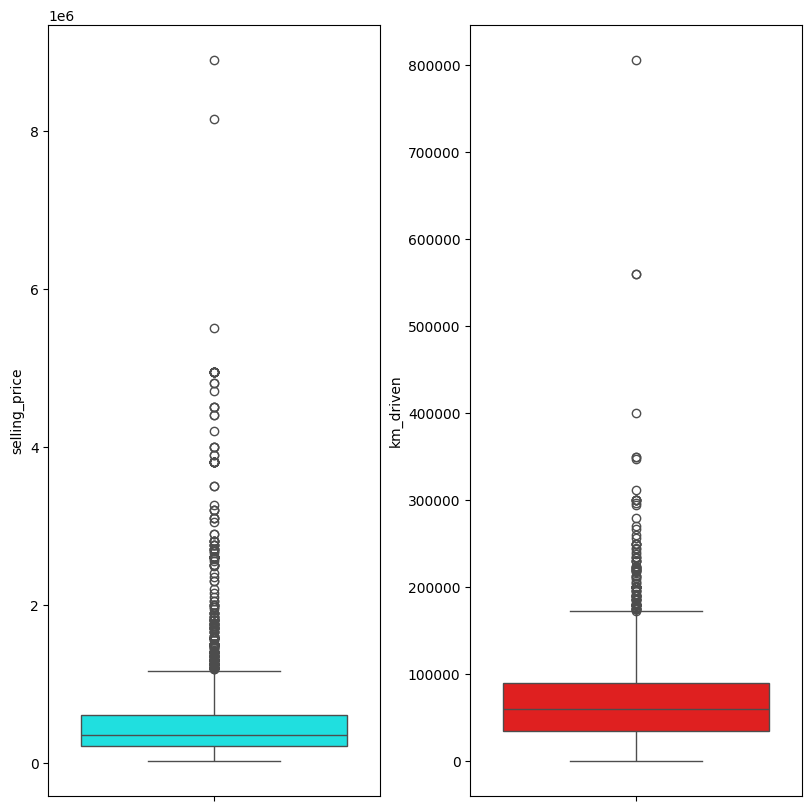

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8,8), constrained_layout=True)
sns.boxplot(df['selling_price'], ax=ax[0], color = 'cyan')
sns.boxplot(df['km_driven'], ax=ax[1], color='red')
plt.show()

## Scatterplots

### Regression plot

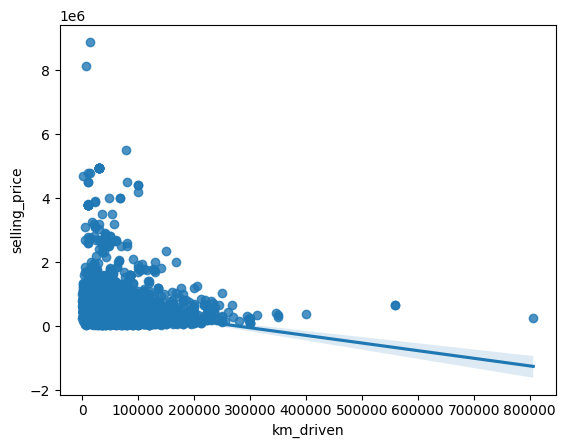

In [13]:
sns.regplot(x="km_driven", y="selling_price", data=df, y_jitter=10000)
plt.show()

### Scatterplot

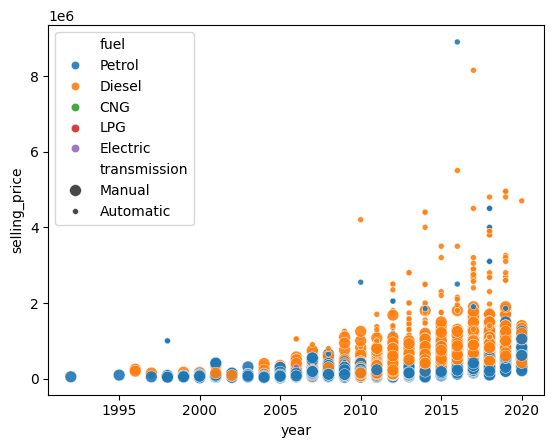

In [111]:
sns.scatterplot(data=df, x="year", y="selling_price", hue="fuel", size="transmission", alpha=0.9)
plt.show()

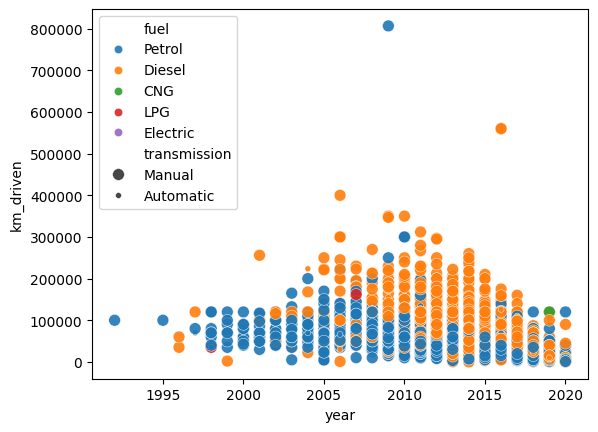

In [112]:
sns.scatterplot(data=df, x="year", y="km_driven", hue="fuel", size="transmission", alpha=0.9)
plt.show()

## Pairplots

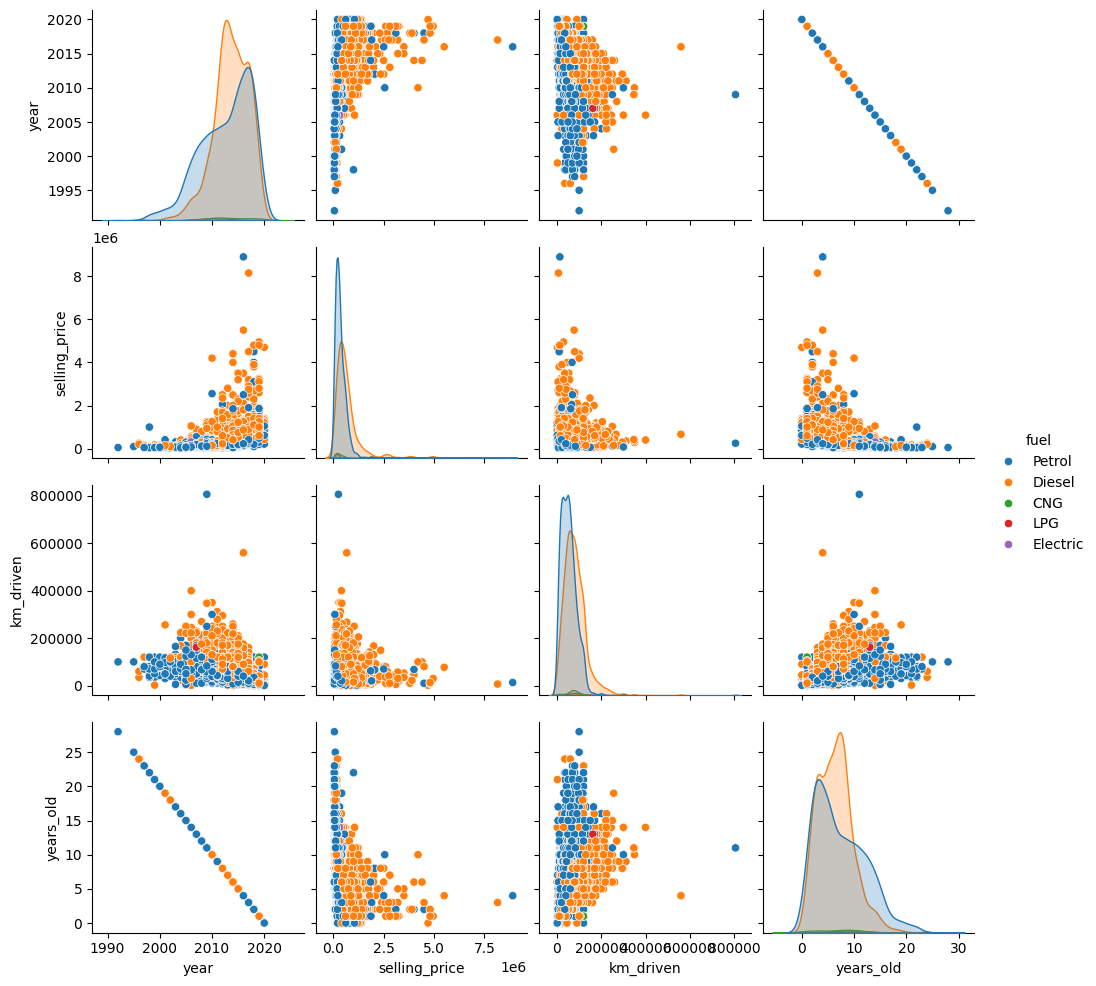

In [105]:
sns.pairplot(df, hue="fuel")
plt.show()

In [15]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

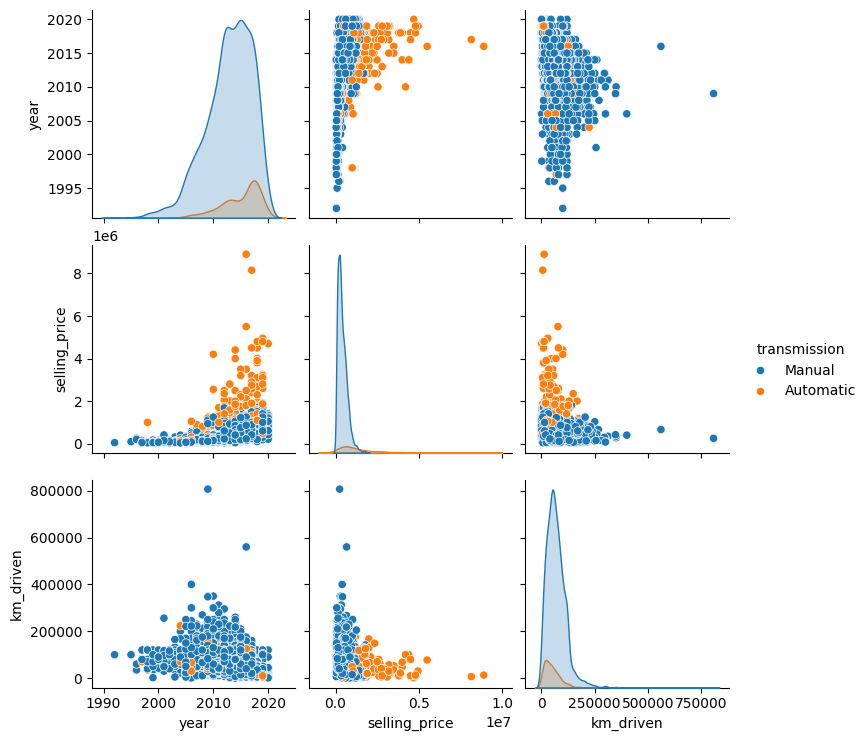

In [18]:
sns.pairplot(df, kind="scatter", diag_kind="kde", hue="transmission")
plt.show()

In [19]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

## Additional column

In [20]:
# Adding the number of years old column
df['years_old'] = df.year.max() - df.year
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


* This doesn't affect the scatter plot

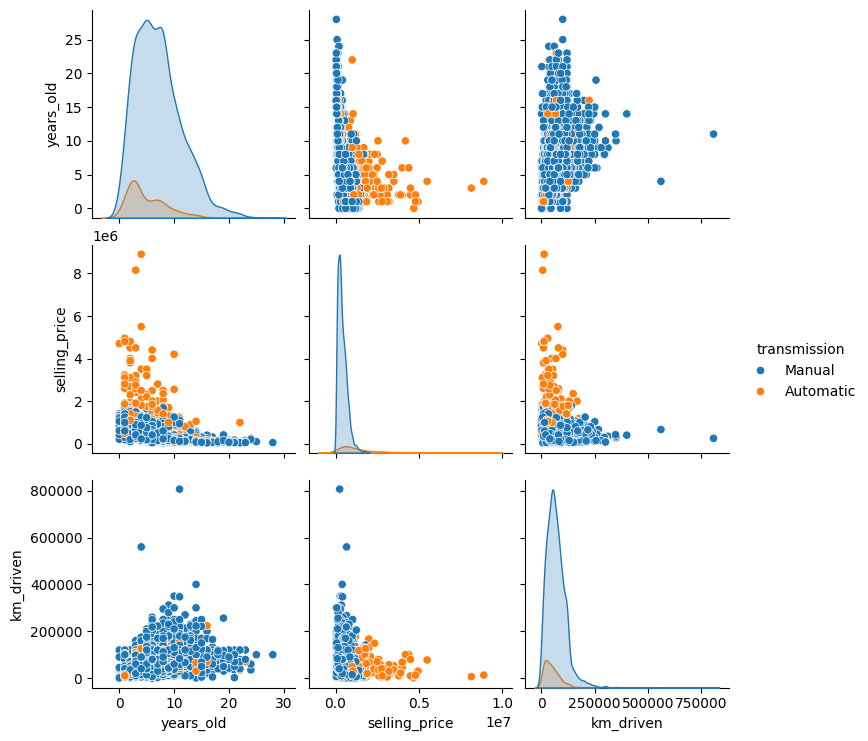

In [21]:
# checking
sns.pairplot(df,
             vars=["years_old", "selling_price", "km_driven"],              
             hue="transmission"
            )
plt.show()

## NOTE:

* Clearly there is a discriminating boundary between manual and automatic

## Groupby stats

In [77]:
df_gb_fuel = df.groupby(by='fuel')

In [78]:
df_gb_fuel.describe()

year                                                         \
           count         mean       std     min     25%     50%     75%   
fuel                                                                      
CNG         40.0  2013.475000  3.961271  2005.0  2010.0  2013.0  2017.0   
Diesel    2153.0  2013.606595  3.408509  1996.0  2012.0  2014.0  2016.0   
Electric     1.0  2006.000000       NaN  2006.0  2006.0  2006.0  2006.0   
LPG         23.0  2010.130435  3.584111  1998.0  2009.0  2011.0  2012.0   
Petrol    2123.0  2012.595855  4.847011  1992.0  2009.0  2014.0  2017.0   

                 selling_price                 ... km_driven            \
             max         count           mean  ...       75%       max   
fuel                                           ...                       
CNG       2020.0          40.0  277174.925000  ...   80000.0  120000.0   
Diesel    2020.0        2153.0  669094.252206  ...  100000.0  560000.0   
Electric  2006.0           1.0  310000.000000  ...   62000.0   62000.0   
LPG       2015.0          23.0  167826.043478  ...  105000.0  170000.0   
Petrol    2020.0        2123.0  344840.137541  ...   70000.0  806599.0   

         years_old                                                     
             count       mean       std   min   25%   50%   75%   max  
fuel                                                                   
CNG           40.0   6.525000  3.961271   0.0   3.0   7.0  10.0  15.0  
Diesel      2153.0   6.393405  3.408509   0.0   4.0   6.0   8.0  24.0  
Electric       1.0  14.000000       NaN  14.0  14.0  14.0  14.0  14.0  
LPG           23.0   9.869565  3.584111   5.0   8.0   9.0  11.0  22.0  
Petrol      2123.0   7.404145  4.847011   0.0   3.0   6.0  11.0  28.0  

[5 rows x 32 columns]

In [102]:
df_gb_fuel.describe()['km_driven']

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
CNG,40.0,67234.750000,29020.658868,4000.0,56507.0,71500.0,80000.0,120000.0
Diesel,2153.0,79630.977706,50486.476662,1.0,47000.0,72000.0,100000.0,560000.0
Electric,1.0,62000.000000,NaN,62000.0,62000.0,62000.0,62000.0,62000.0
LPG,23.0,89634.782609,37838.107399,29000.0,60000.0,90000.0,105000.0,170000.0
Petrol,2123.0,52340.079604,38109.196219,101.0,25000.0,50000.0,70000.0,806599.0


In [83]:
df_gb_fuel.nth(0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,3
157,Maruti Wagon R DUO LPG,2014,210000,90000,LPG,Individual,Manual,First Owner,6
4145,Toyota Camry Hybrid,2006,310000,62000,Electric,Dealer,Automatic,Second Owner,14


In [86]:
df_gb_fuel.nth(23)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
38,Toyota Corolla Altis G AT,2016,900000,50000,Petrol,Individual,Automatic,First Owner,4
59,Hyundai i20 2015-2017 Sportz Option 1.4 CRDi,2014,465000,70000,Diesel,Dealer,Manual,First Owner,6
3014,Maruti Omni CNG,2007,45000,100000,CNG,Individual,Manual,Fourth & Above Owner,13


In [97]:
df_gb_fuel.fuel.get_group('Electric')

4145    Electric
Name: fuel, dtype: object

In [101]:
df[df.fuel == 'Electric']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
4145,Toyota Camry Hybrid,2006,310000,62000,Electric,Dealer,Automatic,Second Owner,14


# Clustering

## DROP

* use only petrol and diesel

In [23]:
df[df['fuel'].isin(["CNG", "LPG", "Electric"])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,3
22,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner,3
157,Maruti Wagon R DUO LPG,2014,210000,90000,LPG,Individual,Manual,First Owner,6
176,Maruti Alto K10 LXI CNG,2020,282000,40000,CNG,Individual,Manual,First Owner,0
222,Maruti Omni LPG CARGO BSIII W IMMOBILISER,2009,80000,90000,LPG,Individual,Manual,Second Owner,11
...,...,...,...,...,...,...,...,...,...
4063,Maruti Eeco 5 STR With AC Plus HTR CNG,2017,440000,14100,CNG,Dealer,Manual,First Owner,3
4076,Maruti Ertiga VXI CNG,2014,595000,56600,CNG,Dealer,Manual,First Owner,6
4140,Maruti Eeco 5 STR With AC Plus HTR CNG,2018,409999,45000,CNG,Individual,Manual,First Owner,2
4145,Toyota Camry Hybrid,2006,310000,62000,Electric,Dealer,Automatic,Second Owner,14


In [25]:
df[~df['fuel'].isin(["CNG", "LPG", "Electric"])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


In [50]:
df_updated = df[~df['fuel'].isin(["CNG", "LPG", "Electric"])].copy()
df_updated.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,13
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,4
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner,6
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner,5
10,Chevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner,5


In [51]:
df_updated.reset_index(drop=True, inplace=True)

In [52]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4276 non-null   object
 1   year           4276 non-null   int64 
 2   selling_price  4276 non-null   int64 
 3   km_driven      4276 non-null   int64 
 4   fuel           4276 non-null   object
 5   seller_type    4276 non-null   object
 6   transmission   4276 non-null   object
 7   owner          4276 non-null   object
 8   years_old      4276 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 300.8+ KB


In [29]:
len(df)

4340

In [30]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

## TRANSFORM

In [31]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoder_transmission = LabelEncoder()

In [54]:
df_updated['transmission'] = label_encoder_transmission.fit_transform(df_updated['transmission'])
df_updated['transmission'].value_counts()

transmission
1    3829
0     447
Name: count, dtype: int64

In [55]:
label_encoder_transmission.classes_

array(['Automatic', 'Manual'], dtype=object)

In [67]:
label_encoder_transmission.transform(label_encoder_transmission.classes_)

array([0, 1])

In [56]:
label_encoder_fuel = LabelEncoder()
df_updated['fuel'] = label_encoder_fuel.fit_transform(df_updated['fuel'])
df_updated['fuel'].value_counts()

fuel
0    2153
1    2123
Name: count, dtype: int64

In [57]:
label_encoder_fuel.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [58]:
label_encoder_fuel.transform(label_encoder_fuel.classes_)

array([0, 1])

## Normalisation of the data

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
print(f"Selling price min: {df_updated['selling_price'].min()}")
print(f"Selling price max: {df_updated['selling_price'].max()}")

Selling price min: 20000
Selling price max: 8900000


In [117]:
df_updated['selling_price'] = MinMaxScaler().fit_transform(df_updated[['selling_price']])
print(f"Selling price min: {df_updated['selling_price'].min()}")
print(f"Selling price max: {df_updated['selling_price'].max()}")

Selling price min: 0.0
Selling price max: 0.9999999999999999


In [118]:
print(f"Km driven min: {df_updated['km_driven'].min()}")
print(f"KM driven max: {df_updated['km_driven'].max()}")

Km driven min: 1
KM driven max: 806599


In [120]:
df_updated['km_driven'] = MinMaxScaler().fit_transform(df_updated[['km_driven']])
print(f"Km driven min: {df_updated['km_driven'].min()}")
print(f"Km driven max: {df_updated['km_driven'].max()}")

Km driven min: 0.0
Km driven max: 1.0


## Principal Component Analysis

### Linear

In [123]:
from sklearn.decomposition import PCA, KernelPCA

In [126]:
transformer = PCA(n_components=3)

In [148]:
# without number of years
cols_of_interest = ["selling_price", "km_driven", "fuel", "transmission"]
transformer.fit(df_updated[cols_of_interest])

PCA(n_components=3)

In [128]:
transformer.explained_variance_ratio_

array([0.7143942 , 0.26915747, 0.01041919])

In [129]:
X_transformed_PCA = transformer.transform(df_updated[cols_of_interest])

In [131]:
X_transformed_PCA.shape

(4276, 3)

In [138]:
df_updated[df_updated['fuel']==1]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,years_old
0,Maruti 800 AC,2007,0.004505,0.086783,1,Individual,1,First Owner,13
1,Maruti Wagon R LXI Minor,2007,0.012950,0.061988,1,Individual,1,First Owner,13
3,Datsun RediGO T Option,2017,0.025901,0.057028,1,Individual,1,First Owner,3
5,Maruti Alto LX BSIII,2007,0.013514,0.154971,1,Individual,1,First Owner,13
6,Hyundai Xcent 1.2 Kappa S,2016,0.059685,0.030993,1,Individual,1,First Owner,4
...,...,...,...,...,...,...,...,...,...
4262,Honda City 1.5 GXI,2005,0.005068,0.185965,1,Individual,1,Third Owner,15
4263,Tata Nano XM,2015,0.019144,0.074385,1,Individual,1,Second Owner,5
4265,Tata Manza Aura Safire BS IV,2010,0.015766,0.074385,1,Individual,1,Second Owner,10
4273,Maruti 800 AC BSIII,2009,0.010135,0.102900,1,Individual,1,Second Owner,11


In [137]:
X_transformed_PCA[df_updated[df_updated['fuel']==1].index]

array([[ 0.50883753,  0.08523198,  0.028726  ],
       [ 0.50934286,  0.08357764,  0.00444147],
       [ 0.50900736,  0.08198389, -0.00764883],
       ...,
       [ 0.50881734,  0.08361551,  0.01206286],
       [ 0.50807796,  0.08506021,  0.03736797],
       [ 0.50936633,  0.08208745, -0.01149833]], shape=(2123, 3))

In [139]:
X_transformed_PCA[df_updated[df_updated['fuel']==0].index]

array([[-0.49243522,  0.12769077,  0.01305261],
       [-0.49348751,  0.13103482,  0.06256464],
       [-0.49243522,  0.12769077,  0.01305261],
       ...,
       [-0.49077299,  0.12938307,  0.00793665],
       [-0.49077299,  0.12938307,  0.00793665],
       [-0.49317573,  0.12399055, -0.01554563]], shape=(2153, 3))

In [140]:
# Diesel indices
id_diesel = df_updated[df_updated['fuel']==0].index

# Petrol indices
id_petrol =  df_updated[df_updated['fuel']==1].index

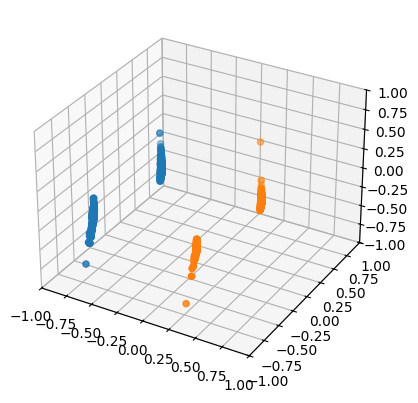

In [147]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_transformed_PCA[id_diesel, 0], X_transformed_PCA[id_diesel, 1], X_transformed_PCA[id_diesel, 2])
ax.scatter(X_transformed_PCA[id_petrol, 0], X_transformed_PCA[id_petrol, 1], X_transformed_PCA[id_petrol, 2])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()

In [151]:
# Diesel and automatic
id_diesel_auto = df_updated[(df_updated['fuel']==0) & (df_updated['transmission']==0)].index
id_diesel_auto

Index([  27,   28,   29,   30,   33,   34,   35,   41,   42,   87,
       ...
       4099, 4122, 4140, 4190, 4210, 4230, 4236, 4238, 4240, 4249],
      dtype='int64', length=254)

In [152]:
# Diesel and manual
id_diesel_manual = df_updated[(df_updated['fuel']==0) & (df_updated['transmission']==1)].index
id_diesel_manual

Index([   2,    4,   14,   16,   25,   26,   37,   43,   44,   45,
       ...
       4258, 4264, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4274],
      dtype='int64', length=1899)

In [153]:
# Petrol and manual
id_petrol_manual = df_updated[(df_updated['fuel']==1) & (df_updated['transmission']==1)].index
id_petrol_manual

Index([   0,    1,    3,    5,    6,    7,    8,    9,   10,   12,
       ...
       4256, 4257, 4259, 4260, 4261, 4262, 4263, 4265, 4273, 4275],
      dtype='int64', length=1930)

In [154]:
# Petrol and manual
id_petrol_auto = df_updated[(df_updated['fuel']==1) & (df_updated['transmission']==0)].index
id_petrol_auto

Index([  11,   23,   36,   39,   77,   98,   99,  116,  160,  164,
       ...
       4030, 4033, 4058, 4105, 4160, 4168, 4223, 4233, 4235, 4247],
      dtype='int64', length=193)

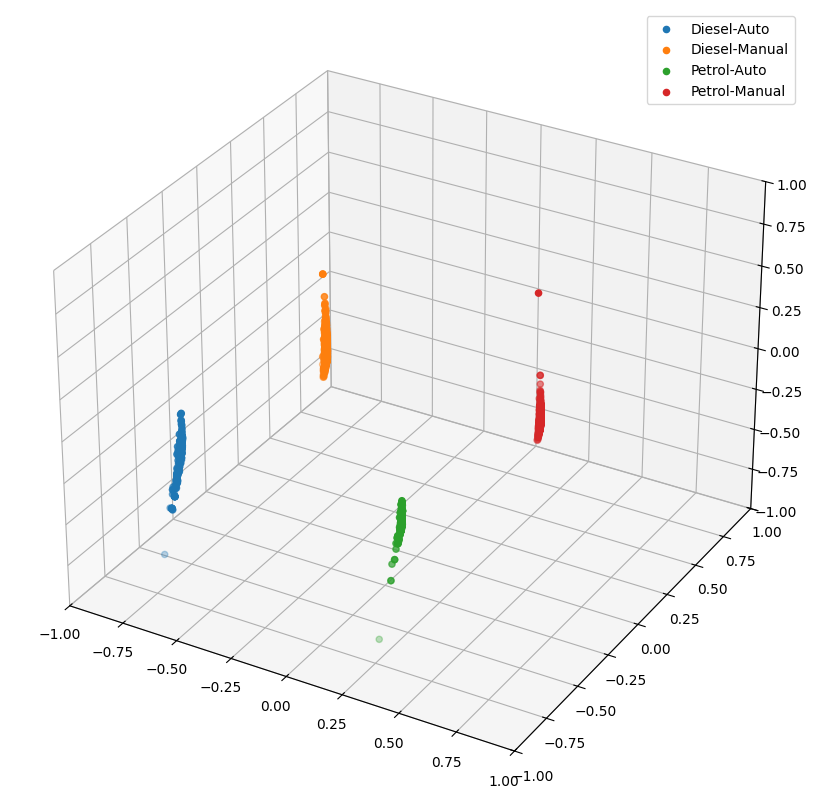

In [158]:
fig = plt.figure(figsize=(8,8), constrained_layout=True)
ax = fig.add_subplot(projection='3d')

ax.scatter(X_transformed_PCA[id_diesel_auto, 0], X_transformed_PCA[id_diesel_auto, 1], X_transformed_PCA[id_diesel_auto, 2], label="Diesel-Auto")
ax.scatter(X_transformed_PCA[id_diesel_manual, 0], X_transformed_PCA[id_diesel_manual, 1], X_transformed_PCA[id_diesel_manual, 2], label="Diesel-Manual")
ax.scatter(X_transformed_PCA[id_petrol_auto, 0], X_transformed_PCA[id_petrol_auto, 1], X_transformed_PCA[id_petrol_auto, 2], label="Petrol-Auto")
ax.scatter(X_transformed_PCA[id_petrol_manual, 0], X_transformed_PCA[id_petrol_manual, 1], X_transformed_PCA[id_petrol_manual, 2], label="Petrol-Manual")

ax.legend(loc='best')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()

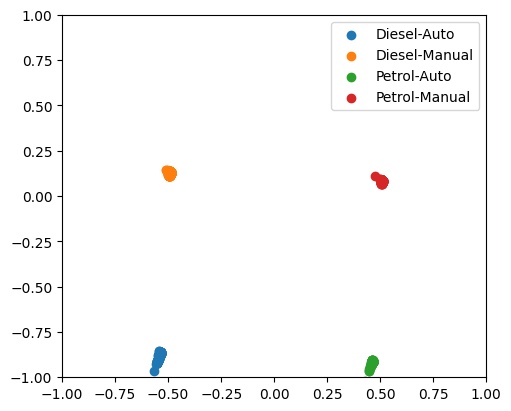

In [161]:
fig = plt.figure(figsize=(5,4), constrained_layout=True)
ax = fig.add_subplot()

ax.scatter(X_transformed_PCA[id_diesel_auto, 0], X_transformed_PCA[id_diesel_auto, 1], label="Diesel-Auto")
ax.scatter(X_transformed_PCA[id_diesel_manual, 0], X_transformed_PCA[id_diesel_manual, 1], label="Diesel-Manual")
ax.scatter(X_transformed_PCA[id_petrol_auto, 0], X_transformed_PCA[id_petrol_auto, 1], label="Petrol-Auto")
ax.scatter(X_transformed_PCA[id_petrol_manual, 0], X_transformed_PCA[id_petrol_manual, 1], label="Petrol-Manual")

ax.legend(loc='best')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

plt.show()

In [167]:
X_price_km = df_updated[['selling_price', 'km_driven']].to_numpy()

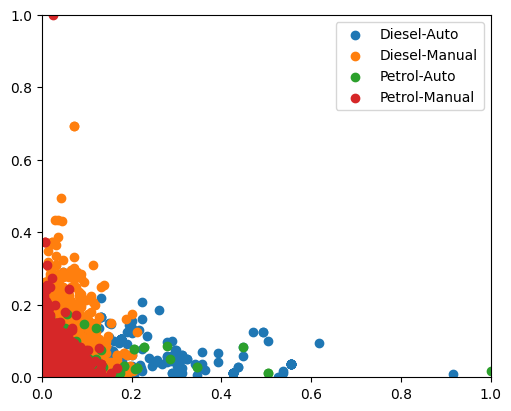

In [169]:
fig = plt.figure(figsize=(5,4), constrained_layout=True)
ax = fig.add_subplot()

ax.scatter(X_price_km[id_diesel_auto, 0], X_price_km[id_diesel_auto, 1], label="Diesel-Auto")
ax.scatter(X_price_km[id_diesel_manual, 0],X_price_km[id_diesel_manual, 1], label="Diesel-Manual")
ax.scatter(X_price_km[id_petrol_auto, 0], X_price_km[id_petrol_auto, 1], label="Petrol-Auto")
ax.scatter(X_price_km[id_petrol_manual, 0], X_price_km[id_petrol_manual, 1], label="Petrol-Manual")

ax.legend(loc='best')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

plt.show()

In [172]:
transformer = PCA(n_components=2).fit(df_updated[['selling_price', 'km_driven']].to_numpy())

In [173]:
transformer.explained_variance_ratio_

array([0.61231396, 0.38768604])

In [174]:
X_price_km_PCA = transformer.transform(df_updated[['selling_price', 'km_driven']].to_numpy())

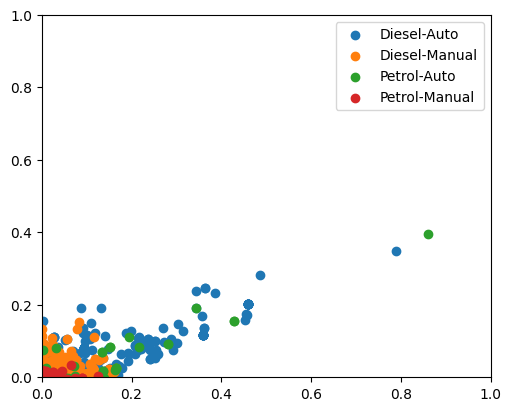

In [175]:
fig = plt.figure(figsize=(5,4), constrained_layout=True)
ax = fig.add_subplot()

ax.scatter(X_price_km_PCA[id_diesel_auto, 0], X_price_km_PCA[id_diesel_auto, 1], label="Diesel-Auto")
ax.scatter(X_price_km_PCA[id_diesel_manual, 0],X_price_km_PCA[id_diesel_manual, 1], label="Diesel-Manual")
ax.scatter(X_price_km_PCA[id_petrol_auto, 0], X_price_km_PCA[id_petrol_auto, 1], label="Petrol-Auto")
ax.scatter(X_price_km_PCA[id_petrol_manual, 0], X_price_km_PCA[id_petrol_manual, 1], label="Petrol-Manual")

ax.legend(loc='best')

ax.set_xlim([0,1])
ax.set_ylim([0,1])

plt.show()

# Correlation

In [61]:
df_updated.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'years_old'],
      dtype='object')

In [62]:
cols_of_interest = ["selling_price", "km_driven", "years_old"]

### Pearson

#### Manual + Automatic

In [121]:
df_corr = df_updated[cols_of_interest].corr(method='pearson')
df_corr

,selling_price,km_driven,years_old
selling_price,1.000000,-0.190798,-0.413692
km_driven,-0.190798,1.000000,0.419702
years_old,-0.413692,0.419702,1.000000


##### Heatmap

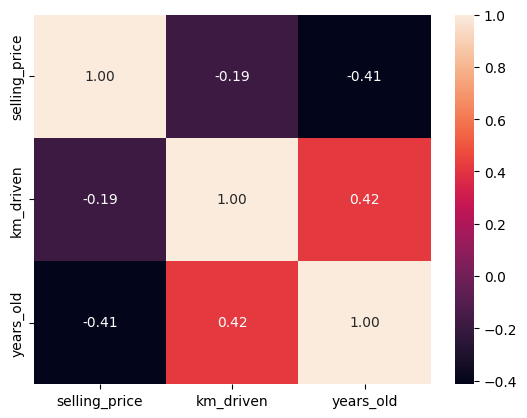

In [64]:
sns.heatmap(df_corr, annot=True, fmt='0.2f')
plt.show()

#### Manual

In [68]:
df_corr_m = df_updated[df_updated['transmission'] == 1][cols_of_interest].corr(method='pearson')
df_corr_m

,selling_price,km_driven,years_old
selling_price,1.000000,-0.221441,-0.623073
km_driven,-0.221441,1.000000,0.395307
years_old,-0.623073,0.395307,1.000000


##### Heatmap

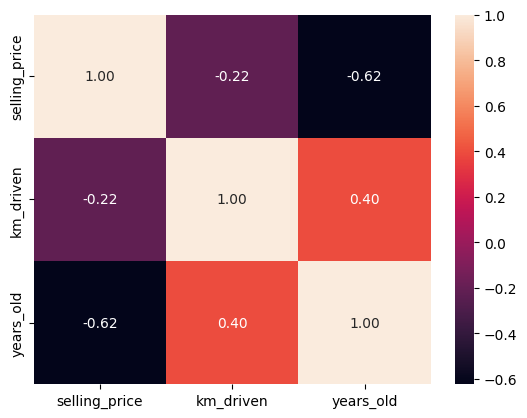

In [69]:
sns.heatmap(df_corr_m, annot=True, fmt='0.2f')
plt.show()

In [74]:
# Spearman correlation
df_corr_m_s = df_updated[df_updated['transmission'] == 1][cols_of_interest].corr(method='spearman')
df_corr_m_s

,selling_price,km_driven,years_old
selling_price,1.000000,-0.300273,-0.720896
km_driven,-0.300273,1.000000,0.539615
years_old,-0.720896,0.539615,1.000000


##### Heatmap

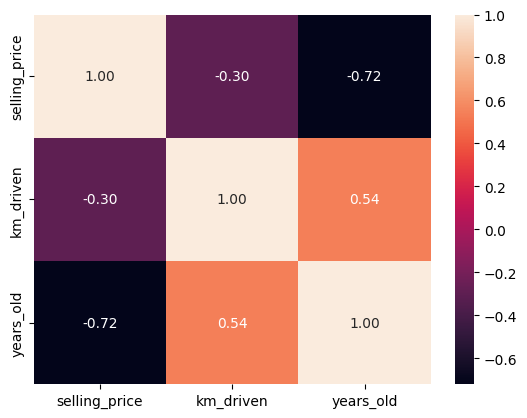

In [73]:
sns.heatmap(df_corr_m_s, annot=True, fmt='0.2f')
plt.show()

#### Automatic

In [70]:
df_corr_a = df_updated[df_updated['transmission'] == 0][cols_of_interest].corr(method='pearson')
df_corr_a

,selling_price,km_driven,years_old
selling_price,1.000000,-0.162049,-0.328115
km_driven,-0.162049,1.000000,0.587103
years_old,-0.328115,0.587103,1.000000


##### Heatmap

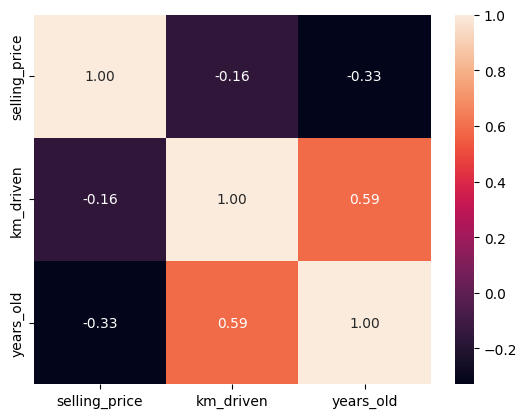

In [71]:
sns.heatmap(df_corr_a, annot=True, fmt='0.2f')
plt.show()

In [75]:
# Spearman correlation
df_corr_a_s = df_updated[df_updated['transmission'] == 0][cols_of_interest].corr(method='spearman')
df_corr_a_s

,selling_price,km_driven,years_old
selling_price,1.000000,-0.106316,-0.337514
km_driven,-0.106316,1.000000,0.714093
years_old,-0.337514,0.714093,1.000000


##### Heatmap

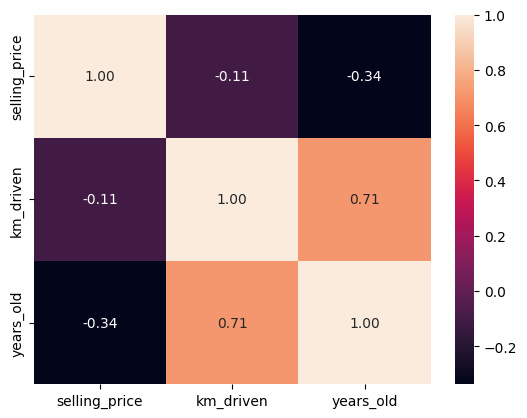

In [76]:
sns.heatmap(df_corr_a_s, annot=True, fmt='0.2f')
plt.show()

### Spearman

* It is a strength of monotonic relationship between the variables

## TODO:

1. Kendall Tau